(enrichment-analysis)=

# Gene set enrichment and pathway analysis 
https://www.sc-best-practices.org/conditions/gsea_pathway.html

https://en.wikipedia.org/wiki/Calinski%E2%80%93Harabasz_index

https://en.wikipedia.org/wiki/Dunn_index

https://en.wikipedia.org/wiki/Silhouette_(clustering)#:~:text=The%20silhouette%20score%20is%20specialized,distance%20or%20the%20Manhattan%20distance.

https://nbisweden.github.io/workshop-archive/workshop-scRNAseq/2020-01-27/labs/compiled/scanpy/scanpy_04_clustering.html

https://decoupler-py.readthedocs.io/en/latest/notebooks/progeny.html

## Motivation

Single-cell RNA-seq provides unprecedented insights into variations in cell types between conditions, tissue types, species and individuals. Differential gene expression analysis of the single-cell data is almost always followed by *gene set enrichment analysis*, where the aim is to identify gene programs, such as biological processes, gene ontologies or regulatory pathways that are over-represented in an experimental condition compared to control or other conditions, on the basis of differentially expressed (DE) genes. 

To determine the pathways enriched in a cell type-specific manner between two conditions, first a relevant collection of gene set signatures is selected, where each gene set defines a biological process (e.g. epithelial to mesenchymal transition, metabolism etc) or pathway (e.g. MAPK signalling). For each gene set in the collection, DE genes present in the gene set are used to obtain a test statistic that is then used to assess the enrichment of the gene set. Depending on the type of the enrichment test chosen, gene expression measurements may or may not be used for the computation of the test statistic. 

In this chapter, we first provide an overview of different types of gene set enrichment tests, introduce some commonly used gene signature collections and discuss best practices for pathway enrichment and functional enrichment analysis in general.  We conclude the chapter by demonstrating three analytical approaches for gene set enrichment analysis. Note that we use the terms pathway analysis, pathway enrichment analysis, gene set enrichment analysis and functional analysis interchangeably in this chapter. 

## Pathway and gene set collections

Gene sets are a curated list of gene names (or gene ids) that are known to be involved in a biological process through previous studies and/or experiments. The Molecular Signatures Database (MSigDB) {cite}`subramanian2005gene,liberzon2011molecular` is the most comprehensive database consisting of 9 collections of gene sets. Some commonly used collections are C5, which is the gene ontology (GO) collection, C2 collection of curated gene signatures from published studies that are typically context (e.g. tissue, condition) specific, but also include KEGG and REACTOME gene signatures. For cancer studies, the Hallmark collection is commonly used, and for immunologic studies the C7 collection is a common choice. Note that these signatures are mainly derived from Bulk-seq measurements and measure continuous phenotypes. Recently and with the wide-spread availability of scRNA-seq datasets, databases have evolved that provide curated marker lists derived from published single cell studies that define cell types in various tissues and species. These include CellMarker {cite}`zhang2019cellmarker` and PanglaoDB {cite}`franzen2019panglaodb`. Curated marker lists are not limited to those made available in databases, and can be curated by oneself.

## Null hypotheses in gene set enrichment analysis

Gene set tests can be *competitive* or *self-contained* as defined by Goeman and Buhlmann (2007) {cite}`goeman2007analyzing`. Competitive gene set testing tests whether the genes in the set are highly ranked in terms of differential expression relative to the genes not in the set. The sampling unit here is genes, so the test can be done with a single sample (i.e. single-sample GSEA). The test requires genes that are not in the set (i.e background genes). In self-contained gene set testing, the sampling unit is the subject, so multiple samples per group are required, but it is not required to have genes that are not present in the set. A self-contained gene set test tests whether genes in the test set are differentially expressed without regard to any other gene measured in the dataset. These distinctions between the two null hypotheses make differences to the interpretation of gene set enrichment results. Note that in biological data there exist inter-gene correlations, that is the expression of genes in the same pathways are correlated. There are only a few tests that accomodate inter-gene correlations. We will discuss these methods later. Detailed explanations on various gene set tests can be found in [*limma* user manual](https://bioconductor.org/packages/release/bioc/manuals/limma/man/limma.pdf).

## Gene set tests and pathway analysis

In scRNA-seq data analysis, gene set enrichment is generally carried out on clusters of cells or cell types, one-at-a-time. Genes differentially expressed in a cluster or cell type are used to identify over-represented gene sets from the selected collection, using simple hypergeomtric tests or Fisher's exact test (as in *Enrichr* {cite}`chen2013enrichr`), for example. Such tests do not require the actual gene expression measurements and read counts to compute enrichment statistics, as they rely on testing how significant it is that an $X$ number of genes in a gene set are differentially expressed in the experiment compared to the number of non-DE genes in the set.

*fgsea* {cite}`korotkevich2021fast` is a more common tool for gene set enrichment test. *fgsae* is a computationally faster implementation of the well established *Gene Set Enrichment Analysis (GSEA)* algorithm {cite}`subramanian2005gene`, which computes enrichment statistics on the basis of some preranked gene-level test statistics. *fgsea* computes an enrichment score using some signed statistics of the genes in the gene set, such as  the t-statistics, log fold-changes (logFC) or p-values from the differential expression test. An empirical (estimated from the data) null distribution is computed for the enrichment score using some random gene sets of the same size, and a p-value is computed to determine the significance of the enrichment score. The p-values are then adjusted for multiple hypothesis testing. GSVA {cite}`hanzelmann2013gsva` is another example of preranked gene set enrichment approaches. We should note that the pre-ranked gene set tests are not specific to single cell datasets and apply to Bulk-seq assays as well.

An alternative approach to test for gene set enrichment in a group of cells, that is clusters or cells of identical types, is to create pseudo-bulk samples from single cells and use gene set enrichment methods developed for Bulk RNA-seq. Several self-contained and competitive gene set enrichment tests, namely *fry* and *camera* are implemented in *limma* {cite}`ritchie2015limma`, which are compatible with the differential gene expression analysis framework through linear models and Empirical Bayes moderation of test statistics {cite}`smyth2005limma`. Linear models can accomodate complex experimental designs (e.g. subjects, perturbations, batches, nested contrasts, interactions etc) through the design matrix. In addition, the `camera` and `roast` gene set tests implemented in limma account for inter-gene correlations. Gene set tests in *limma* can also be applied to (properly transformed and normalised) single cell measurements without pseudo-bulk generation. However, there are currently no benchmarks that had assessed the accuracy of gene set test results when these methods are applied directly to single cells.  




| Test | Bulk or SC  | Type of Null Hypothesis | Input |
| :------------ |:---------------:|:----------:| :-------
| Hypergeometric  | both | competitive  | gene counts |
| Fisher's Exact  | both | competitive |  gene counts | 
| GSEA$^*$          | bulk | competitive| gene ranks |
| GSVA$^*$          | bulk | competitive | gene ranks|
| fgsea           | both | competitive | gene ranks |
| fry$^*$             | bulk | self-contained | expression matrix |
| camera$^*$          | bulk | competitive | expression matrix |
| roast$^*$           | bulk | self-contained | expression matrix|

Table: Gene set tests, type of the applicable assays and Null Hypothesis they test

$^*$ These tests are practically applicable to single cell datasets, although their application to single cell may not be a common practice.

### Gene set test vs. pathway activity inference 

Gene set tests test whether a pathway is enriched, in other words over-represented, in one condition compared to others, say, in healthy donors compared to severe COVID-19 patients in the monocyte population. An alternative approach is to simply score the activity of a pathway or gene signature, in absolute sense, in individual cells, rather than testing for a differential activity between conditions. Some of the widely used tools for inference of gene set activity in general (including pathway activity) in individual cells include *VISION* {cite}`detomaso2019functional`, *AUCell* {cite}`aibar2017scenic`, pathway overdispersion analysis using *Pagoda2* {cite}`fan2016characterizing, lake2018integrative` and simple combined z-score {cite}`lee2008inferring`. 

*DoRothEA* {cite}`garcia2019benchmark` and *PROGENy* {cite}`schubert2018perturbation` are among functional analysis tools developed to infer transcription factor (TF) - target activities originally in Bulk RNA data. Holland et al. {cite}`holland2020robustness` found that Bulk RNA-seq methods *DoRothEA* and *PROGENy* have optimal performance in simulated scRNA-seq data, and even partially outperform tools specifically designed for scRNA-seq analysis despite the drop-out events and low library sizes in single cell data. Holland et al. also concluded that pathway and TF activity inference is more sensitive to the choice of gene sets rather than the statistical methods. This observation though can be specific to functional enrichment analyses and be explained by the fact that TF-target relations are context-specific; that is TF-target associations in one cell type may actually differ from another cell type or tissue.  

In contrast to Holand et al., Zhang et al. {cite}`zhang2020benchmarking` found that single-cell-based tools, specifically Pagoda2, outperform bulk-base methods from three different aspects of accuracy, stability and scalability. It should be noted that pathway and gene set activity inference tools inherently do not account for batch effects or biological variations other than the biological variation of interest. Therefore, it is up to the data analyst to ensure that the differential gene expression analysis step has worked properly.

Furthermore, while the tools mentioned here score every gene set in individual cells, they are not able to select for the most biologically relevant gene sets among all scored gene sets. scDECAF (https://github.com/DavisLaboratory/scDECAF) is a gene set activity inference tool that allows data-driven selection of the most informative gene sets, thereby aids in dissecting meaningful cellular heterogeneity.

## Technical considerations

### Filtering out the gene sets with low number of genes 

A common practice is to exclude any gene sets with a few genes overlapping the data or Highly Variable Genes (HVG) in the pre-processing step. Zhang et al. {cite}`zhang2020benchmarking` found that the performance of both single-cell-based and bulk-based methods drops as gene coverage, that is the number of genes in pathways/gene sets, decreases. Holland et al {cite}`holland2020robustness` also found that gene sets of smaller size adversely impacts the performance of Bulk-seq *DoRothEA* and *PROGENy* on single cell data. These report collectively support that filtering gene sets with low gene counts, say less than 10 or 15 genes in the set, is beneficial in pathway analysis. Damian & Gorfine (2004) {cite}`damian2004statistical` attributed this to the fact gene variances in gene sets with a smaller number of genes are more likely to be large, whereas gene variances in larger gene sets tend to be smaller. This impacts the accuracy of the test statistics computed to test for enrichment. Zhang et al. additionally found that pathway analysis was susceptible to normalization procedures applied to gene expression measurements.

### Data normalization

Read counts in single cell experiments are typically normalised early on in the pre-processing pipeline to ensure that measurements are comparable across cells of various library sizes. Zhang et al. {cite}`zhang2020benchmarking` found that normalisation by *SCTransform* {cite}`hafemeister2019normalization` and *scran* {cite}`lun2016step` generally improves the performance of both single-cell- and bulk-based pathway scoring tools. They found that the performance of *AUCell* (a rank-base method) and *z-score* (transformation to zero mean, unit standard deviation) is particularly affected by normalization with distinct methods.

## Case study: Pathway enrichment analysis and activity level scoring in human PBMC single cells

### Prepare and explore the data

We first download the 25K PBMC data and follow the standard `scanpy` workflow for normalisation of read counts and subsetting on the highly variable genes. The dataset contains untreated and IFN-$\beta$ stimulated human PBMC cells {cite}`gspa:kang2018`. We explore patterns of variation in the data with UMAP representation of 4000 highly variable genes. 

In [27]:
from __future__ import annotations

import numpy as np
import pandas as pd

import scanpy as sc
import anndata as ad
import decoupler
import seaborn.objects as so
from tqdm.notebook import tqdm

import session_info

In [2]:
sc.settings.set_figure_params(dpi=200, frameon=False)
sc.set_figure_params(dpi=200)
sc.set_figure_params(figsize=(4, 4))

#Filtering warnings from current version of matplotlib.
import warnings

warnings.filterwarnings("ignore", message=".*Parameters 'cmap' will be ignored.*", category=UserWarning)
warnings.filterwarnings("ignore", message="Tight layout not applied.*", category=UserWarning)

In [13]:
adata = sc.read("kang_counts_25k.h5ad", backup_url="https://figshare.com/ndownloader/files/34464122")
print(adata)

AnnData object with n_obs × n_vars = 24673 × 15706
    obs: 'nCount_RNA', 'nFeature_RNA', 'tsne1', 'tsne2', 'label', 'cluster', 'cell_type', 'replicate', 'nCount_SCT', 'nFeature_SCT', 'integrated_snn_res.0.4', 'seurat_clusters'
    var: 'name'
    obsm: 'X_pca', 'X_umap'


adata.X is a sparse matrix with 24673 cells x 15706 genes. It contains the float count of the gene expression values from the single cell experiment.

In [15]:
adata.X

<24673x15706 sparse matrix of type '<class 'numpy.float32'>'
	with 14184532 stored elements in Compressed Sparse Column format>

In [16]:
#Storing the counts for later use.
adata.layers["counts"] = adata.X.copy()
#Renaming label to condition.
adata.obs = adata.obs.rename({"label": "condition"}, axis=1)

#Normalizing
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
adata

AnnData object with n_obs × n_vars = 24673 × 15706
    obs: 'nCount_RNA', 'nFeature_RNA', 'tsne1', 'tsne2', 'condition', 'cluster', 'cell_type', 'replicate', 'nCount_SCT', 'nFeature_SCT', 'integrated_snn_res.0.4', 'seurat_clusters'
    var: 'name'
    uns: 'log1p'
    obsm: 'X_pca', 'X_umap'
    layers: 'counts'

While the current adata object comes with UMAP and PCA embeddings, these have been corrected for stimulation condition, which we don't want for this analysis. Instead we will recompute these.

In [17]:
#!pip install ipywidgets --upgrade
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

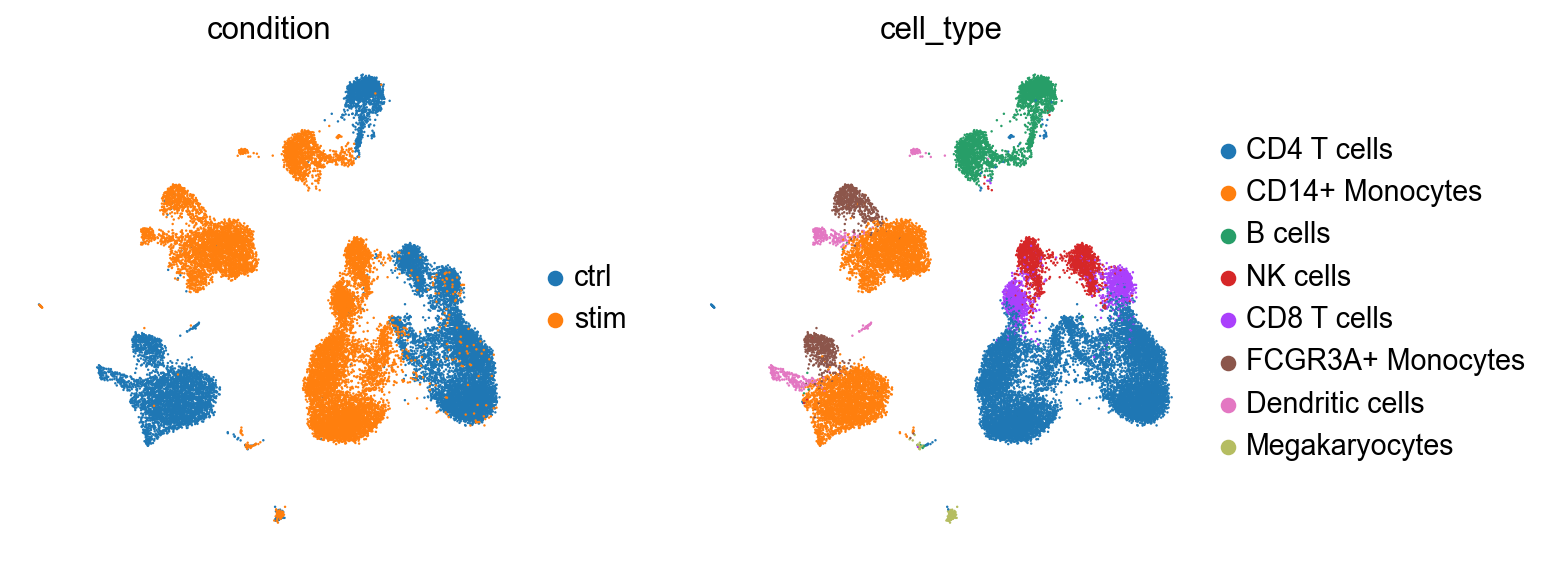

In [18]:
sc.pl.umap(adata, color=["condition", "cell_type"], frameon=False, ncols=2)

### Cluster Results

 - Silhouette Score: This score measures how similar a point is to its own cluster compared to other clusters. The silhouette_score function from sklearn.metrics is used.
 - Calinski-Harabasz Index: This index evaluates the ratio of the sum of between-cluster dispersion and of within-cluster dispersion. The calinski_harabasz_score function from sklearn.metrics is used.
 - Dunn Index: This index is calculated by finding the minimum inter-cluster distance and dividing it by the maximum intra-cluster distance. The custom function dunn_index is used to compute this.

In [12]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from scipy.spatial.distance import pdist, squareform


# Silhouette score
silhouette_avg = silhouette_score(adata.obsm['X_umap'], adata.obs['cell_type'])
print(f"Silhouette Score: {silhouette_avg}")

# Calinski-Harabasz index
calinski_harabasz = calinski_harabasz_score(adata.obsm['X_umap'], adata.obs['cell_type'])
print(f"Calinski-Harabasz Index: {calinski_harabasz}")

# Dunn index calculation function
def dunn_index(X, labels):
    # Compute pairwise distances
    distances = squareform(pdist(X))
    
    # Find unique cluster labels
    unique_labels = np.unique(labels)
    
    # Calculate inter-cluster distances (minimum distance between points in different clusters)
    inter_cluster_dists = np.inf
    for i in tqdm(range(len(unique_labels)), desc='Calculating inter-cluster distances'):
        for j in range(i + 1, len(unique_labels)):
            cluster_i = X[labels == unique_labels[i]]
            cluster_j = X[labels == unique_labels[j]]
            inter_cluster_dists = min(inter_cluster_dists, np.min(distances[np.ix_(labels == unique_labels[i], labels == unique_labels[j])]))
    
    # Calculate intra-cluster distances (maximum distance within a cluster)
    intra_cluster_dists = 0
    for label in tqdm(unique_labels, desc='Calculating intra-cluster distances'):
        cluster = X[labels == label]
        intra_cluster_dists = max(intra_cluster_dists, np.max(pdist(cluster)) if len(cluster) > 1 else 0)
    
    # Calculate Dunn index
    return inter_cluster_dists / intra_cluster_dists if intra_cluster_dists != 0 else np.inf

# Dunn index
dunn = dunn_index(adata.obsm['X_umap'], adata.obs['cell_type'])
print(f"Dunn Index: {dunn}")

Silhouette Score: -0.005828415974974632
Calinski-Harabasz Index: 6053.264791842292


Calculating inter-cluster distances:   0%|          | 0/8 [00:00<?, ?it/s]

Calculating intra-cluster distances:   0%|          | 0/8 [00:00<?, ?it/s]

Dunn Index: 8.37153388731368e-05


- Silhouette Score:

Value: -0.005828415974974632, Interpretation: The Silhouette score ranges from -1 to 1, where a higher value indicates better-defined clusters. A score close to 0 suggests that clusters are overlapping or poorly defined. A negative value, as in this case, typically indicates that data points might have been assigned to the wrong clusters. Given that your score is slightly negative, it suggests potential issues with cluster separability or consistency.

- Calinski-Harabasz Index:

Value: 6053.264791842292, Interpretation: The Calinski-Harabasz index, also known as the Variance Ratio Criterion, is used to assess cluster separation. Higher values indicate better-defined clusters. Your score is relatively high, suggesting that the clusters are well-separated in terms of variance, which contradicts the negative Silhouette score.

- Dunn Index:

Value: 8.37153388731368e-05, Interpretation: The Dunn index evaluates cluster compactness and separation. Higher values are better, indicating well-separated and compact clusters. However, your Dunn index value is very low, suggesting poor separation and high intra-cluster distances.

- Analysis: Contradiction Between Metrics: The results are somewhat contradictory. The high Calinski-Harabasz index suggests good separation, while the negative Silhouette score and extremely low Dunn index suggest otherwise. This inconsistency might be due to differences in how these metrics evaluate clustering quality.

## Cluster-Level Gene Set Enrichment Analysis With `decoupler`

GSEA requires differentially expressed genes. We use `rank_genes_groups` in `scanpy` to rank genes according to their test statistics for differential expression:

In [19]:
#adata.obs["group"] = adata.obs.condition.astype("string")
#Find DE genes by t-test.
sc.tl.rank_genes_groups(adata, "condition", method="t-test", key_added="t-test")

rank_gene_groups_df requires adata to have a .var["highly_variable"] field.

In [22]:
#Finding highly variable genes using count data.
#subset parameter: Inplace subset to highly-variable genes if True otherwise merely indicate highly variable genes.
#This adds var: 'name', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm' to adata object.
sc.pp.highly_variable_genes(adata, n_top_genes=4000, flavor="seurat_v3", subset=False, layer="counts")
adata

AnnData object with n_obs × n_vars = 24673 × 15706
    obs: 'nCount_RNA', 'nFeature_RNA', 'tsne1', 'tsne2', 'condition', 'cluster', 'cell_type', 'replicate', 'nCount_SCT', 'nFeature_SCT', 'integrated_snn_res.0.4', 'seurat_clusters'
    var: 'name', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'condition_colors', 'cell_type_colors', 't-test', 'hvg'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

#### Retrieving gene sets
Download and read the `gmt` file for the REACTOME pathways annotated in the C2 collection of MSigDB. 

In [29]:
# Downloading reactome pathways
from pathlib import Path

if not Path("c2.cp.reactome.v7.5.1.symbols.gmt").is_file():
    !wget -O 'c2.cp.reactome.v7.5.1.symbols.gmt' https://figshare.com/ndownloader/files/35233771

def gmt_to_decoupler(pth: Path) -> pd.DataFrame:
    """
    Parse a gmt file to a decoupler pathway dataframe.
    """
    from itertools import chain, repeat

    pathways = {}

    with Path(pth).open("r") as f:
        for line in f:
            name, _, *genes = line.strip().split("\t")
            pathways[name] = genes

    return pd.DataFrame.from_records(
        chain.from_iterable(zip(repeat(k), v) for k, v in pathways.items()),
        columns=["geneset", "genesymbol"],
    )

reactome = gmt_to_decoupler("c2.cp.reactome.v7.5.1.symbols.gmt")
reactome.head()

geneset genesymbol
0  REACTOME_INTERLEUKIN_6_SIGNALING       JAK2
1  REACTOME_INTERLEUKIN_6_SIGNALING       TYK2
2  REACTOME_INTERLEUKIN_6_SIGNALING        CBL
3  REACTOME_INTERLEUKIN_6_SIGNALING      STAT1
4  REACTOME_INTERLEUKIN_6_SIGNALING      IL6ST

In [28]:
from sklearn.preprocessing import StandardScaler


#Define a function to calculate differential expression scores for each cell.
def calculate_de_scores(adata, cell_index):
    # Get expression values for the specific cell
    cell_expr = adata.X[cell_index].toarray().flatten()
    
    # Create a DataFrame to hold DE scores
    de_scores = pd.DataFrame(index=adata.var_names, columns=['scores'])
    
    # Calculate DE scores as the z-score normalized expression of the specific cell
    scaler = StandardScaler()
    de_scores['scores'] = scaler.fit_transform(cell_expr.reshape(-1, 1)).flatten()
    
    return de_scores

In [30]:
#Prepare the result matrix for GSEA scores.
num_cells = adata.shape[0]
num_gene_sets = len(reactome['geneset'].unique())
gsea_results_matrix = np.zeros((num_cells, num_gene_sets))

# Loop through each cell to calculate DE scores and run GSEA
for cell_index in tqdm(range(num_cells)):
    de_scores = calculate_de_scores(adata, cell_index)
    
    # Run GSEA using decoupler
    _, norm, _ = decoupler.run_gsea(
        de_scores.T,
        reactome,
        source="geneset",
        target="genesymbol"
    )
    
    # Store the normalized enrichment scores (NES) in the result matrix
    gsea_results_matrix[cell_index, :] = norm.iloc[:, 0].values

  0%|          | 0/24673 [00:00<?, ?it/s]

In [ ]:
# Convert the result matrix to an AnnData object for visualization
adata_gsea = sc.AnnData(X=gsea_results_matrix)
adata_gsea.var_names = reactome['geneset'].unique()
adata_gsea.obs_names = adata.obs_names

# Optionally, save the result matrix for later use
np.save('gsea_results_matrix.npy', gsea_results_matrix)

In [23]:
#Extract the genes differentially expressed between 'stimulated' and 'control' conditions.
conditions = adata.obs["condition"].unique()
t_stats = {}
for condition in conditions:
    # Get dataframe of DE results for condition vs. rest
    t_stats_df = (
        sc.get.rank_genes_groups_df(adata, condition, key="t-test")
        # Subset to highly variable genes
        .set_index("names")
        .loc[adata.var["highly_variable"]]
        # Sort by absolute score
        .sort_values("scores", key=np.abs, ascending=False)
        # Format for decoupler
        [["scores"]]
    )
    t_stats[condition] = t_stats_df
conditions

['ctrl', 'stim']
Categories (2, object): ['ctrl', 'stim']

Now we will use the python package [`decoupler`](https://decoupler-py.readthedocs.io/en/latest/) {cite}`badia2022decoupler` to perform GSEA enrichment tests on our data.

#### Running GSEA

Running GSEA: use the t-statistics object we built from the t-test to rank the pathways for the phenotype upon IFN stimulation and computes p-values for each of the pathways.

In [42]:
#Filtering genesets to match behaviour of fgsea.
geneset_size = reactome.groupby("geneset").size()
gsea_genesets = geneset_size.index[(geneset_size > 15) & (geneset_size < 500)]

#scores, norm, pvals = decoupler.run_gsea(t_stats.T, reactome[reactome["geneset"].isin(gsea_genesets)], source="geneset", target="genesymbol")
#Running GSEA for each condition.
gsea_results = {}
for condition, stats in tqdm(t_stats.items()):
    scores, norm, pvals = decoupler.run_gsea(
        stats.T, 
        reactome, 
        source="geneset", 
        target="genesymbol"
    )
    gsea_results[condition] = {"scores": scores, "norm": norm, "pvals": pvals}

#Example output for one of the conditions.
print(gsea_results["stim"]['norm'])

  0%|          | 0/2 [00:00<?, ?it/s]

{'scores': source  REACTOME_ABC_FAMILY_PROTEINS_MEDIATED_TRANSPORT  \
scores                                         0.628678   

source  REACTOME_ABC_TRANSPORTERS_IN_LIPID_HOMEOSTASIS  \
scores                                       -0.529662   

source  REACTOME_ABC_TRANSPORTER_DISORDERS  \
scores                             0.80772   

source  REACTOME_ABERRANT_REGULATION_OF_MITOTIC_EXIT_IN_CANCER_DUE_TO_RB1_DEFECTS  \
scores                                           0.517632                           

source  REACTOME_ABERRANT_REGULATION_OF_MITOTIC_G1_S_TRANSITION_IN_CANCER_DUE_TO_RB1_DEFECTS  \
scores                                           0.670897                                      

source  REACTOME_ACTIVATED_NOTCH1_TRANSMITS_SIGNAL_TO_THE_NUCLEUS  \
scores                                          -0.765477           

source  REACTOME_ACTIVATION_OF_AMPK_DOWNSTREAM_OF_NMDARS  \
scores                                         -0.706959   

source  REACTOME_ACTIVATION_OF_ANTER

In [105]:
gsea_results['ctrl']['norm']

source  REACTOME_ABC_FAMILY_PROTEINS_MEDIATED_TRANSPORT  \
scores                                        -1.162795   

source  REACTOME_ABC_TRANSPORTERS_IN_LIPID_HOMEOSTASIS  \
scores                                        0.923569   

source  REACTOME_ABC_TRANSPORTER_DISORDERS  \
scores                           -1.334707   

source  REACTOME_ABERRANT_REGULATION_OF_MITOTIC_EXIT_IN_CANCER_DUE_TO_RB1_DEFECTS  \
scores                                          -0.868928                           

source  REACTOME_ABERRANT_REGULATION_OF_MITOTIC_G1_S_TRANSITION_IN_CANCER_DUE_TO_RB1_DEFECTS  \
scores                                          -1.163121                                      

source  REACTOME_ACTIVATED_NOTCH1_TRANSMITS_SIGNAL_TO_THE_NUCLEUS  \
scores                                           1.502761           

source  REACTOME_ACTIVATION_OF_AMPK_DOWNSTREAM_OF_NMDARS  \
scores                                          1.272066   

source  REACTOME_ACTIVATION_OF_ANTERIOR_HOX_GENES_IN_HINDBRAIN_DEVELOPMENT_DURING_EARLY_EMBRYOGENESIS  \
scores                                           1.030252                                               

source  REACTOME_ACTIVATION_OF_ATR_IN_RESPONSE_TO_REPLICATION_STRESS  \
scores                                           0.925934              

source  REACTOME_ACTIVATION_OF_BH3_ONLY_PROTEINS  ...  \
scores                                 -0.708557  ...   

source  REACTOME_UNFOLDED_PROTEIN_RESPONSE_UPR  \
scores                               -0.811892   

source  REACTOME_UPTAKE_AND_ACTIONS_OF_BACTERIAL_TOXINS  \
scores                                        -0.686924   

source  REACTOME_UPTAKE_AND_FUNCTION_OF_DIPHTHERIA_TOXIN  \
scores                                         -0.703685   

source  REACTOME_VASOPRESSIN_REGULATES_RENAL_WATER_HOMEOSTASIS_VIA_AQUAPORINS  \
scores                                          -0.788097                       

source  REACTOME_VEGFR2_MEDIATED_CELL_PROLIFERATION  \
scores                                     1.257131   

source  REACTOME_VEGFR2_MEDIATED_VASCULAR_PERMEABILITY  \
scores                                       -1.106593   

source  REACTOME_VESICLE_MEDIATED_TRANSPORT  \
scores                             1.022241   

source  REACTOME_VIRAL_MESSENGER_RNA_SYNTHESIS  \
scores                                0.980184   

source  REACTOME_VISUAL_PHOTOTRANSDUCTION  \
scores                            1.01986   

source  REACTOME_ZBP1_DAI_MEDIATED_INDUCTION_OF_TYPE_I_IFNS  
scores                                          -0.811495    

[1 rows x 860 columns]

In [ ]:
#Create a simulated data.
#Define the shape of the simulated data.
num_cells = 24673
num_gene_sets = 860

#Generate random normalized enrichment scores (NES) for the simulated data.
np.random.seed(0)  # For reproducibility
simulated_gsea_results_matrix = np.random.rand(num_cells, num_gene_sets)

#Save the simulated data to a .npy file.
np.save('simulated_gsea_results_matrix.npy', simulated_gsea_results_matrix)

### Cluster With KMeans

Combined NES shape: (860, 2)


c:\Users\user\Documents\GitHub\PathSingle\venv\lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


AttributeError: 'Series' object has no attribute 'codes'

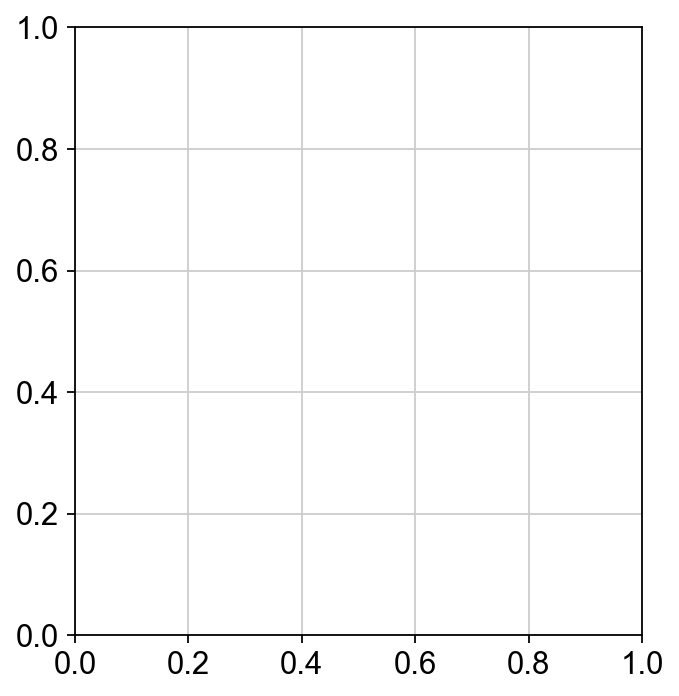

In [132]:
import os
import scanpy as sc
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import scipy.sparse
import umap
import matplotlib.pyplot as plt


os.environ["LOKY_MAX_CPU_COUNT"] = '4'
#Extract normalized enrichment scores (NES) from GSEA results for both conditions.

#Combine NES values into a single dataframe for clustering.
gsea_nes_combined = pd.DataFrame({'ctrl': gsea_results['ctrl']['norm'].iloc[0, :],'stim': gsea_results['stim']['norm'].iloc[0, :]}, index=gsea_results['ctrl']['norm'].columns)

#Verify the combined NES data.
print(f"Combined NES shape: {gsea_nes_combined.shape}")

#Check for NaN values and handle them.
if gsea_nes_combined.isna().any().any():
    print("NaN values found in NES data. Filling NaNs with zero.")
    gsea_nes_combined = gsea_nes_combined.fillna(0)

# Convert NES values to dense matrix
gsea_nes_combined_dense = gsea_nes_combined.values

#Convert normalized values to AnnData object.
adata_gsea = sc.AnnData(gsea_nes_combined.T)

#Perform UMAP on the dense NES values with appropriate n_neighbors.
umap_model = umap.UMAP(n_neighbors=15, random_state=0)
umap_coords = umap_model.fit_transform(gsea_nes_combined_dense)

#Perform KMeans clustering on the UMAP coordinates.
kmeans = KMeans(n_clusters=2, random_state=0).fit(umap_coords)

# Create an AnnData object for visualization with 860 samples (pathways)
adata_gsea = sc.AnnData(umap_coords)
adata_gsea.obs['kmeans2'] = pd.Categorical(kmeans.labels_)

# Create the 'condition' labels for the 860 pathways
condition_labels = ['ctrl' if i < 430 else 'stim' for i in range(860)]
adata_gsea.obs['condition'] = pd.Categorical(condition_labels)

# Plot the UMAP with KMeans clustering results using matplotlib
plt.figure(figsize=(10, 5))

# Plot KMeans clusters
plt.subplot(1, 2, 1)
plt.scatter(umap_coords[:, 0], umap_coords[:, 1], c=adata_gsea.obs['kmeans2'].codes, cmap='viridis', label='KMeans Clusters')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.title('KMeans Clustering on GSEA NES Values')
plt.legend()

# Plot conditions
plt.subplot(1, 2, 2)
plt.scatter(umap_coords[:, 0], umap_coords[:, 1], c=adata_gsea.obs['condition'].codes, cmap='viridis', label='Conditions')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.title('Conditions')
plt.legend()

plt.tight_layout()
plt.show()

In [130]:
gsea_nes_combined_dense.shape

(860, 2)

## PROGENy Model
PROGENy is a comprehensive resource containing a curated collection of pathways and their target genes, with weights for each interaction. Here is a brief description of each pathway:
- Androgen: involved in the growth and development of the male reproductive organs.
- EGFR: regulates growth, survival, migration, apoptosis, proliferation, and differentiation in mammalian cells
- Estrogen: promotes the growth and development of the female reproductive organs.
- Hypoxia: promotes angiogenesis and metabolic reprogramming when O2 levels are low.
- JAK-STAT: involved in immunity, cell division, cell death, and tumor formation.
- MAPK: integrates external signals and promotes cell growth and proliferation.
- NFkB: regulates immune response, cytokine production and cell survival.
- p53: regulates cell cycle, apoptosis, DNA repair and tumor suppression.
- PI3K: promotes growth and proliferation.
- TGFb: involved in development, homeostasis, and repair of most tissues.
- TNFa: mediates haematopoiesis, immune surveillance, tumour regression and protection from infection.
- Trail: induces apoptosis.
- VEGF: mediates angiogenesis, vascular permeability, and cell migration.
- WNT: regulates organ morphogenesis during development and tissue repair.

In [39]:
progeny = decoupler.get_progeny(organism='human', top=500)
progeny

source   target     weight       p_value
0     Androgen  TMPRSS2  11.490631  0.000000e+00
1     Androgen   NKX3-1  10.622551  2.242078e-44
2     Androgen   MBOAT2  10.472733  4.624285e-44
3     Androgen     KLK2  10.176186  1.944414e-40
4     Androgen     SARG  11.386852  2.790209e-40
...        ...      ...        ...           ...
6995       p53    ZMYM4  -2.325752  1.522388e-06
6996       p53    CFDP1  -1.628168  1.526045e-06
6997       p53   VPS37D   2.309503  1.537098e-06
6998       p53    TEDC1  -2.274823  1.547037e-06
6999       p53  CCDC138  -3.205113  1.568160e-06

[7000 rows x 4 columns]

To infer pathway enrichment scores we will run the multivariate linear model (mlm) method. For each cell in our dataset (adata), it fits a linear model that predicts the observed gene expression based on all pathways’ Pathway-Gene interactions weights. Once fitted, the obtained t-values of the slopes are the scores. If it is positive, we interpret that the pathway is active and if it is negative we interpret that it is inactive.

In [40]:
decoupler.run_mlm(
    mat=adata,
    net=progeny,
    source='source',
    target='target',
    weight='weight',
    verbose=True,
    use_raw=False
)

Running mlm on mat with 24673 samples and 15706 targets for 14 sources.


100%|██████████| 3/3 [00:20<00:00,  6.99s/it]


Pathway activity matrix shape: (24673, 14)
Pathway names: Index(['Androgen', 'EGFR', 'Estrogen', 'Hypoxia', 'JAK-STAT', 'MAPK', 'NFkB',
       'PI3K', 'TGFb', 'TNFa', 'Trail', 'VEGF', 'WNT', 'p53'],
      dtype='object')
Pathways in adata.obs: ['Androgen', 'EGFR', 'Estrogen', 'Hypoxia', 'JAK-STAT', 'MAPK', 'NFkB', 'PI3K', 'TGFb', 'TNFa', 'Trail', 'VEGF', 'WNT', 'p53']


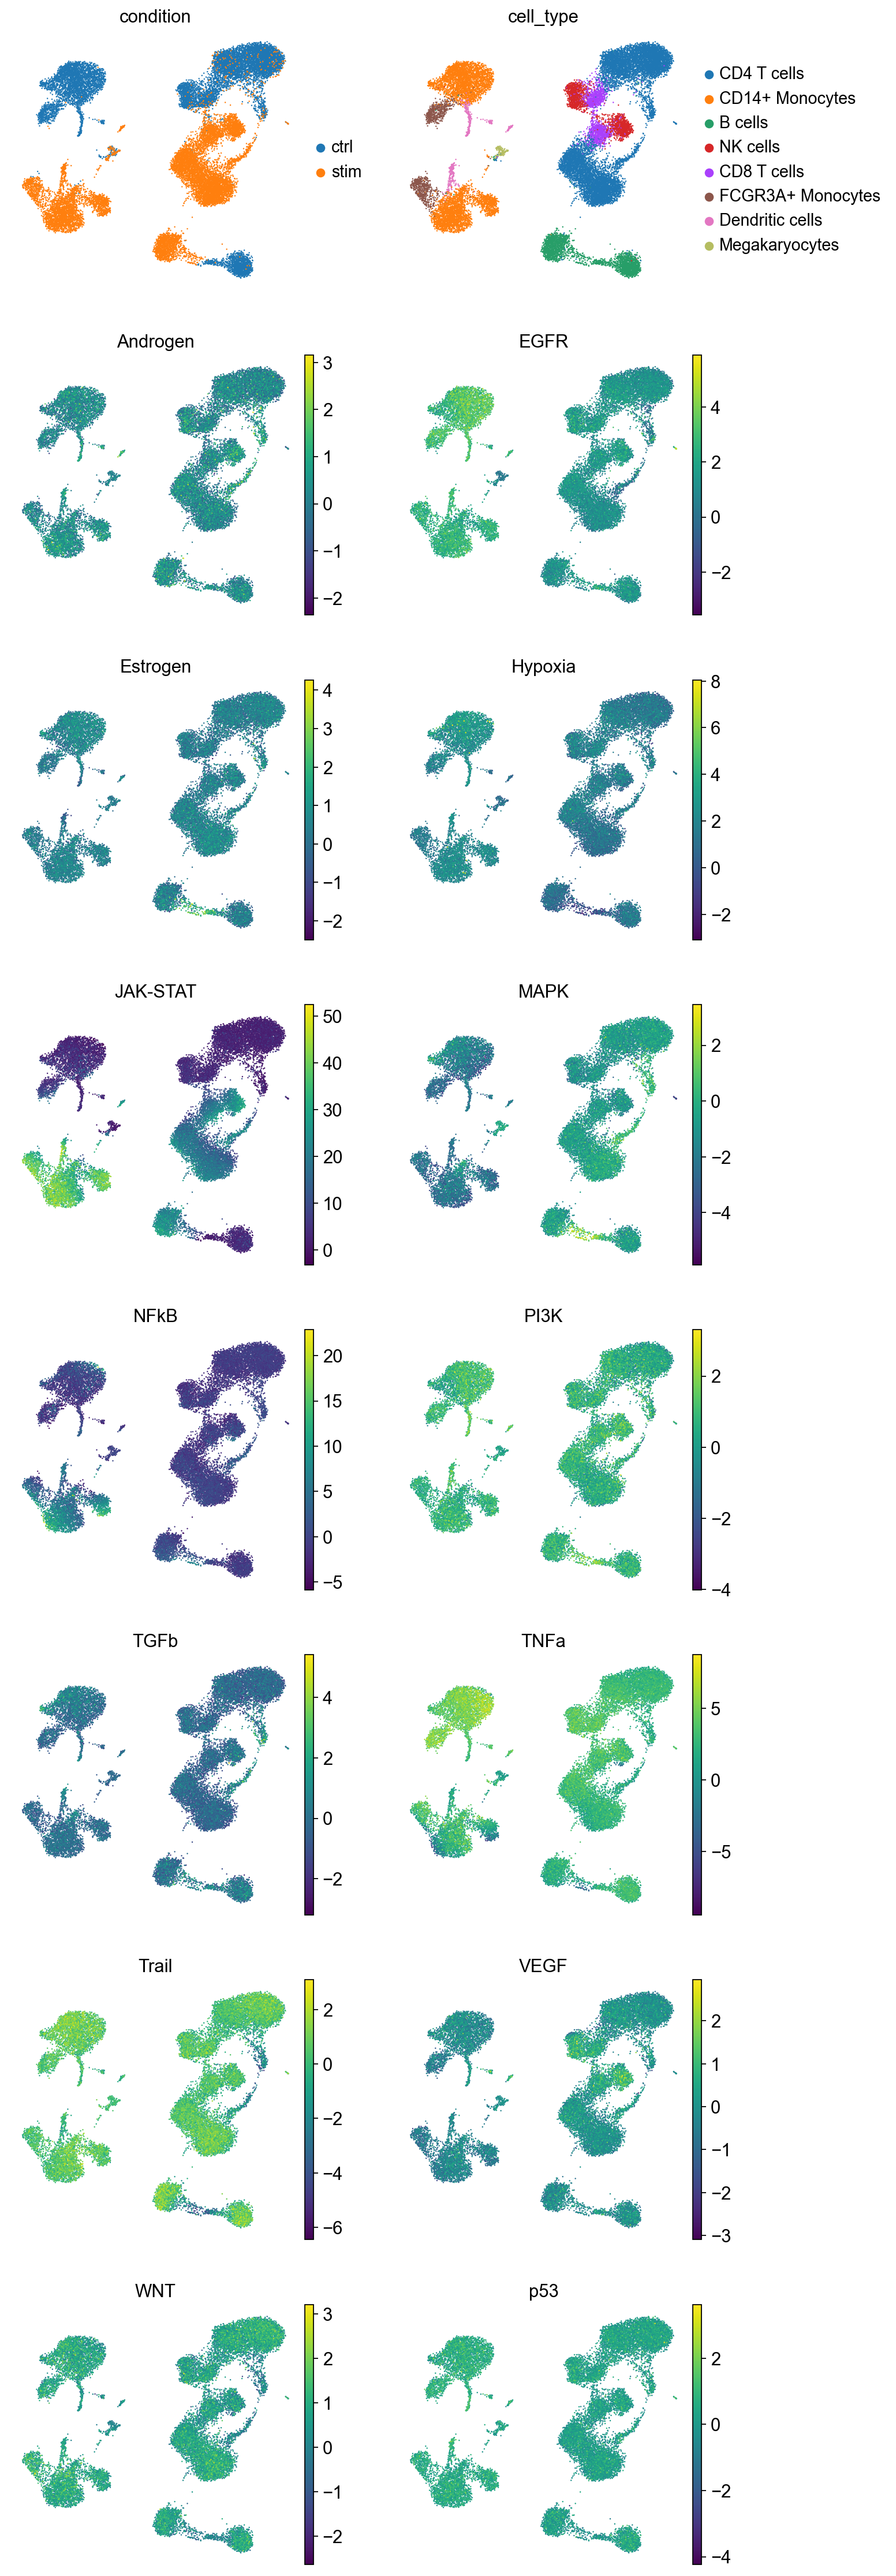

In [47]:
acts = decoupler.get_acts(adata, obsm_key='mlm_estimate')
#sc.pl.umap(acts, color=["condition", "cell_type"], frameon=False, ncols=2)

# Verify the structure of pathway activity matrix
print("Pathway activity matrix shape:", acts.obsm['mlm_estimate'].shape)
print("Pathway names:", acts.var_names)

# Convert the pathway activity matrix to a DataFrame
pathway_activity_df = pd.DataFrame(
    acts.obsm['mlm_estimate'],
    index=adata.obs_names,
    columns=acts.var_names
)

# Add pathway activity to adata.obs
for pathway in acts.var_names:
    adata.obs[pathway] = pathway_activity_df[pathway]

# Get pathway names that are successfully added to adata.obs
pathways_in_obs = [pathway for pathway in acts.var_names if pathway in adata.obs.columns]

# Verify pathways added to adata.obs
print("Pathways in adata.obs:", pathways_in_obs)

# Plotting UMAP with pathway activity
sc.pl.umap(
    adata,
    color=["condition", "cell_type"] + pathways_in_obs,
    frameon=False,
    ncols=2,
)

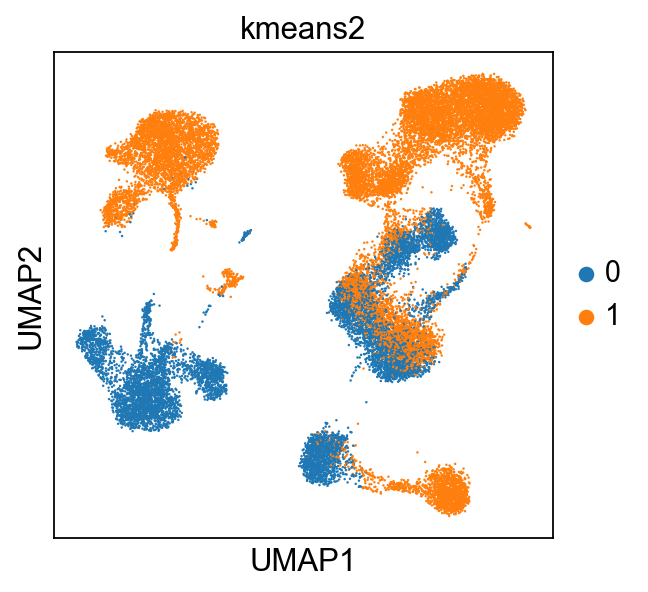

In [77]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import os


os.environ["LOKY_MAX_CPU_COUNT"] = '4'
# extract pca coordinates
X_pca = acts.obsm['mlm_estimate'] 

# kmeans with k=2
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_pca) 
adata.obs['kmeans2'] = kmeans.labels_.astype(str)

sc.pl.umap(adata, color=['kmeans2'])

### Cluster Results

In [33]:
#Extract pathway activity matrix for metric calculation.
pathway_activity_matrix = acts.obsm['mlm_estimate']

# Silhouette score
silhouette_avg = silhouette_score(pathway_activity_matrix, acts.obs['cell_type'])
print(f"Silhouette Score: {silhouette_avg}")

# Calinski-Harabasz index
calinski_harabasz = calinski_harabasz_score(pathway_activity_matrix, acts.obs['cell_type'])
print(f"Calinski-Harabasz Index: {calinski_harabasz}")

# Dunn index
dunn = dunn_index(pathway_activity_matrix, acts.obs['cell_type'])
print(f"Dunn Index: {dunn}")

Silhouette Score: -0.2747938632965088
Calinski-Harabasz Index: 601.5998120103834


Calculating inter-cluster distances:   0%|          | 0/8 [00:00<?, ?it/s]

Calculating intra-cluster distances:   0%|          | 0/8 [00:00<?, ?it/s]

Dunn Index: 0.014608261470199373


## Cell-level pathway activity scoring using AUCell

Unlike the previous approach where we assessed gene set *enrichment* per *cluster* (or rather cell type), one can *score* the activity level of pathways and gene sets in each individual cell, that is based on absolute gene expression in the cell, regardless of expression of genes in the other cells. This we can achieve by activity scoring tools such as `AUCell`.

Similar to `GSEA`, we will be using the `decoupler` implementation of `AUCell`.

In [25]:
%%time
decoupler.run_aucell(
    adata,
    reactome,
    source="geneset",
    target="genesymbol",
    use_raw=False,
)

CPU times: total: 13min 8s
Wall time: 12min 17s


In [26]:
adata

AnnData object with n_obs × n_vars = 24673 × 15706
    obs: 'nCount_RNA', 'nFeature_RNA', 'tsne1', 'tsne2', 'condition', 'cluster', 'cell_type', 'replicate', 'nCount_SCT', 'nFeature_SCT', 'integrated_snn_res.0.4', 'seurat_clusters', 'group'
    var: 'name', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'condition_colors', 'cell_type_colors', 't-test'
    obsm: 'X_pca', 'X_umap', 'aucell_estimate'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

We now add the scores for the interferon-related REACTOME pathways to the `obs` field of the `AnnData` object and annotate the activity level of these pathways in each of the cells on the UMAP:

In [27]:
ifn_pathways = [
    "REACTOME_INTERFERON_SIGNALING",
    "REACTOME_INTERFERON_ALPHA_BETA_SIGNALING",
    "REACTOME_INTERFERON_GAMMA_SIGNALING",
]

adata.obs[ifn_pathways] = adata.obsm["aucell_estimate"][ifn_pathways]

Plot the scores on the umap

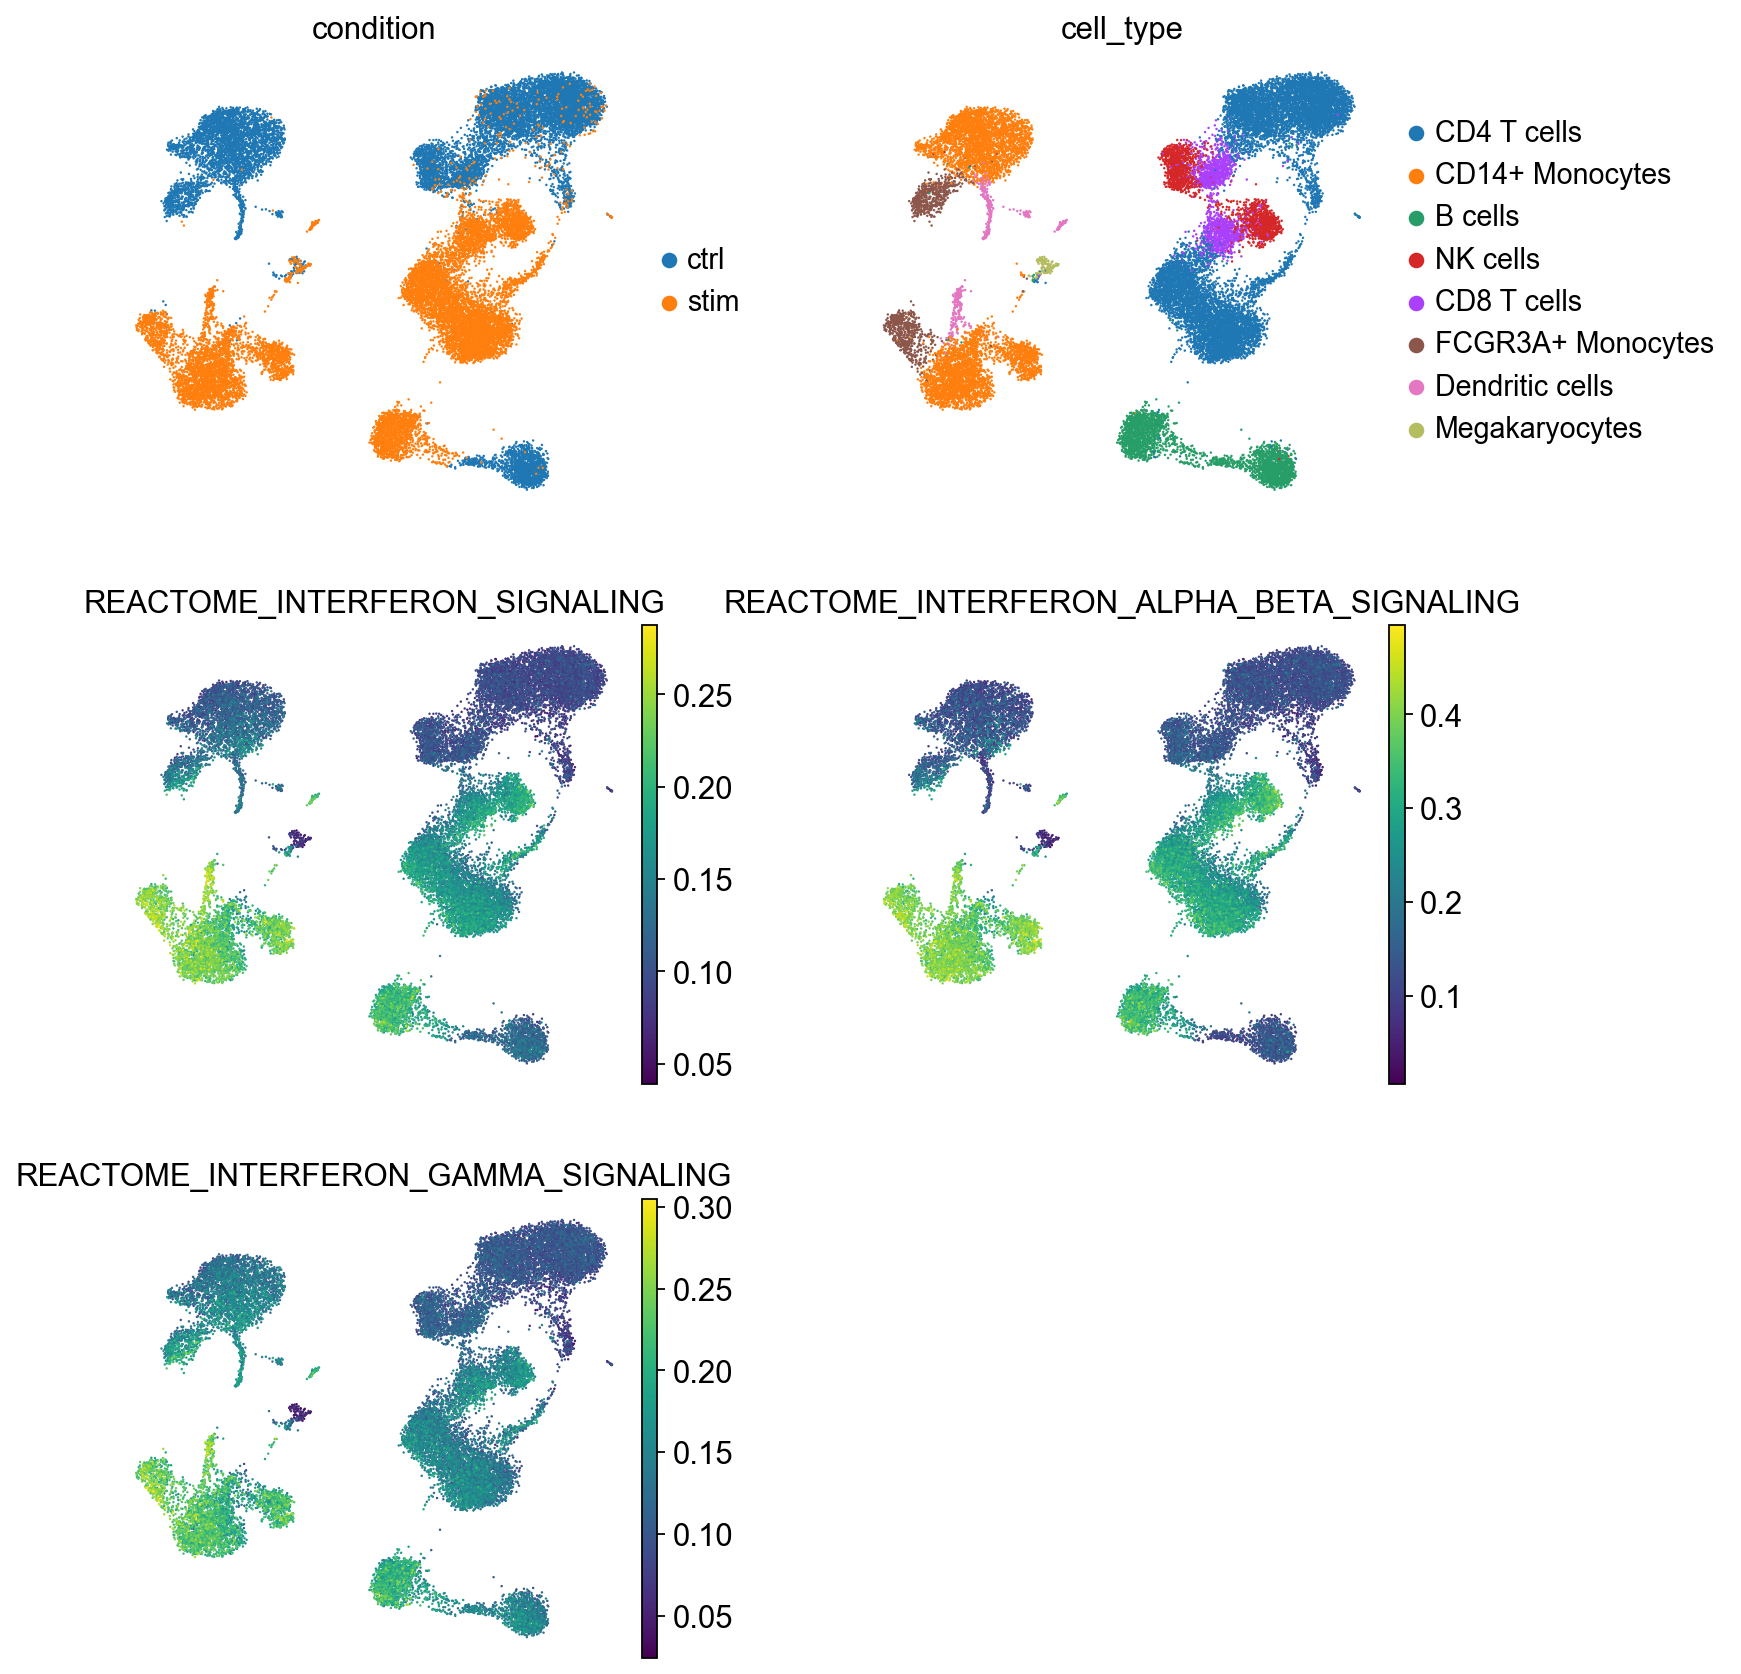

In [28]:
sc.pl.umap(
    adata,
    color=["condition", "cell_type"] + ifn_pathways,
    frameon=False,
    ncols=2,
    wspace=0.3,
)

`AUCell` scores the pathways well-known to be implicated in interferon signalling high in IFN-stimulated cells, while cells in the control condition generally have low scores for these pathways, demonstrating that gene set scoring with `AUCell` has been successful. Also note that the scores are generally larger for terms that are ranked higher in the gene set enrichment test results by `GSEA`. The concordance between pathway activity scores by `AUCell` and gene set enrichment test by `GSEA` is promising, given that we know a priori that IFN-related pathways should be the top-ranked terms. In addition, the effect of IFN stimulation is very large in this dataset and this contributes to the performance of the methods here. 

In cluster-level t-test approach, differentially expressed genes are found by comparing a cluster to all other clusters, which in this case includes both control and stimulated cells. Linear models allow us to compare cells in the stimulated condition only to those in the control group, resulting in more accurate identification of genes responding to the stimulus. Indeed, linear models can accommodate for complex experimental designs, for example, identification of gene sets enriched in `Cell type A in treatment 1` compared to `Cell type A in treatment 2`; that is, across perturbation and across cell types effects, while adjusting for batch effects, between-individual variations, gender and strain differences in mouse models etc. 

In the next section, we demonstrate a limma-fry workflow that generalize to realistic data analysis routines, say, for single-cell case control studies. We first create pseudo-bulk replicates per cell type and condition (3 replicates per condition - cell type combination). We then find gene sets enriched in stimulated compared to control cells in a cell type. We also assess gene set enrichment between two stimulated cell type populations to find differences in signalling pathways. 

As demonstrated above, limma-fry can accomodate gene set enrichment tests for datasets and research problems with complex experimental designs. Both `gsea` and `fry` provide insights into the direction of enrichment (positive or negative score in `gsea` and Direction field in `fry`). They both can be applied to clusters of cells or pseudo-bulk samples. However,  Unlike `gsea`, more flexible tests can be carried out with `fry`. In addition, `fry` can reveal if genes in a pathway are changing between the experimental conditions but in consistent or inconsistent directions. Pathways in which the genes change in consistent direction are identified with `FDR` < 0.05. Pathways in which the genes are DE between the conditions but they change in different, inconsistent directions can be identified where `FDR` > 0.05, but `FDR.Mixed` < 0.05 (assuming 0.05 is the desired significance level). `fry` is bidirectional, applicable to arbitrary designs and works well with small number of samples (although this may not be an issue in single cell). Therefore, the results by `fry` might be of more interest biologically. 

## Key Takeaways

- Normalise your data using standard scRNA-seq normalisation methods and filter gene sets with low gene coverage in your data prior to pathway analysis.
- Be aware of different types of gene set testing tests (i.e. competitive vs self-contained) and use one that suits your application.
- Be aware of differences between gene set enrichment and gene set activity inference. *GSEA* is the widely used gene set test in single-cell studies; Pagoda 2 is found to outperform other pathway activity scoring tools. If your datasets has complex experimental design, consider pseudo-bulk analysis with gene set tests implemented in *limma*, as they are compatible with the linear model framework can additionally account for inter-gene correlations. 

## Quiz

1. What is the difference between gene set enrichment tests and activity scoring?
2. Describe examples of settings where gene set tests should be used? Can you outline examples of settings where pathway activity scoring methods are applicable?
3. What are the two types of Null Hypotheses in gene set enrichment tests. Explain the difference between the two types.
4. What is the most important preprocessing step in pathway analysis? What are the consequences if it is not conducted properly?
5. Name one gene set testing and one gene set activity scoring algorithm and explain it briefly.

## Session info

In [52]:
%%R
sessionInfo()

R version 4.1.2 (2021-11-01)
Platform: x86_64-apple-darwin13.4.0 (64-bit)
Running under: macOS Big Sur 11.6.8

Matrix products: default
LAPACK: /Users/isaac/miniconda3/envs/pathway/lib/libopenblasp-r0.3.21.dylib

locale:
[1] C/UTF-8/C/C/C/C

attached base packages:
[1] stats4    tools     stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] SingleCellExperiment_1.16.0 SummarizedExperiment_1.24.0
 [3] Biobase_2.54.0              GenomicRanges_1.46.1       
 [5] GenomeInfoDb_1.30.1         IRanges_2.28.0             
 [7] S4Vectors_0.32.4            BiocGenerics_0.40.0        
 [9] MatrixGenerics_1.6.0        matrixStats_0.63.0         

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.9             locfit_1.5-9.6         edgeR_3.36.0          
 [4] lattice_0.20-45        bitops_1.0-7           grid_4.1.2            
 [7] zlibbioc_1.40.0        XVector_0.34.0         limma_3.50.1          
[10] Matrix_1.5-3           statmod_1.4

In [53]:
session_info.show()

## References

```{bibliography}
:filter: docname in docnames
:labelprefix: gspa
```

## Contributors

We gratefully acknowledge the contributions of:

### Authors

* Lukas Heumos
* Anastasia Litinetskaya
* Soroor Hediyeh-Zadeh

### Reviewers